In [1]:
cd /data/projects/windturbine-identification/MachineLearningCourse

/data/projects/windturbine-identification/MachineLearningCourse


In [2]:
from pathlib import Path
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


import scripts.windturbines.functions_pattern_recognition as fpr


# Test the earthengine command by getting help on upload.
#!earthengine upload image -h

# %config IPCompleter.greedy=True

Using TensorFlow backend.


In [15]:
COUNTRY = 'AT'

file_years = fpr.get_param(
    COUNTRY, "PATH_TURBINE_LOCATIONS") + "year_assessment_30_7bands.txt"

data = np.loadtxt(file_years)

n_ready = sum(data[:, 0] > 0) / 7

print(f'nmb of turbines checked {n_ready}')


nmb of turbines checked 70.0


In [17]:
data.shape

(7616, 19)

In [4]:
turbines = pd.read_csv(fpr.get_param(COUNTRY, "FILE_TURBINE_LOCATIONS"))

print(turbines.shape)

idx = turbines['Jahr'] > 1999

turbines = turbines[idx]

print(turbines.shape)

n = turbines.shape[0]
results = np.zeros((n, 2))

len_data = round(data.shape[0] / 7)

data_reshaped = data.reshape((len_data, 7, 19))


(1223, 15)
(1088, 15)


In [11]:
data_reshaped

array([[[0.0853    , 0.07175   , 0.0844    , ..., 0.07155   ,
         0.0927    , 0.0697    ],
        [0.12800001, 0.1037    , 0.1192    , ..., 0.09755   ,
         0.13420001, 0.1073    ],
        [0.15880001, 0.1219    , 0.1366    , ..., 0.1048    ,
         0.16060001, 0.13105001],
        ...,
        [0.23800001, 0.1903    , 0.2234    , ..., 0.2166    ,
         0.26859999, 0.25044999],
        [0.29499999, 0.29104999, 0.29339999, ..., 0.29624999,
         0.2965    , 0.29675001],
        [0.16949999, 0.1533    , 0.1494    , ..., 0.12809999,
         0.1962    , 0.18375   ]],

       [[0.087     , 0.0679    , 0.0844    , ..., 0.0764    ,
         0.0716    , 0.0719    ],
        [0.12710001, 0.0973    , 0.1086    , ..., 0.1102    ,
         0.1101    , 0.1137    ],
        [0.1629    , 0.10665   , 0.112     , ..., 0.1363    ,
         0.1249    , 0.1344    ],
        ...,
        [0.26190001, 0.22319999, 0.2406    , ..., 0.2543    ,
         0.2129    , 0.25889999],
        [0.2

# MAX

In [14]:
validation = pd.DataFrame(np.argmax(data_reshaped, axis = 2) + 2000)
validation['Observed'] = turbines['Jahr'].values

#idx = (validation['Observed'] > 2008) & (validation['Observed'] < 2016)

#validation = validation[idx]

#print(validation.shape)

#n_ready_real = validation.shape[0]

validation.head(1000)

,0,1,2,3,4,5,6,Observed
0,2006,2017,2006,2005,2017,2018,2009,2000.0
1,2003,2000,2000,2013,2000,2017,2000,2000.0
2,2000,2000,2000,2008,2017,2000,2000,2000.0
3,2000,2000,2000,2017,2000,2017,2000,2000.0
4,2004,2004,2004,2004,2014,2017,2002,2000.0
5,2006,2006,2000,2010,2000,2017,2000,2000.0
6,2018,2018,2018,2004,2018,2010,2018,2000.0
7,2009,2009,2010,2018,2009,2006,2011,2000.0
8,2003,2009,2003,2017,2000,2000,2009,2000.0
9,2002,2002,2003,2010,2000,2013,2002,2000.0


In [93]:
validation.head()

,0,1,2,3,4,5,6,Observed
0,2006,2017,2006,2005,2017,2018,2009,2000.0
1,2003,2000,2000,2013,2000,2017,2000,2000.0
2,2000,2000,2000,2008,2017,2000,2000,2000.0
3,2000,2000,2000,2017,2000,2017,2000,2000.0
4,2004,2004,2004,2004,2014,2017,2002,2000.0


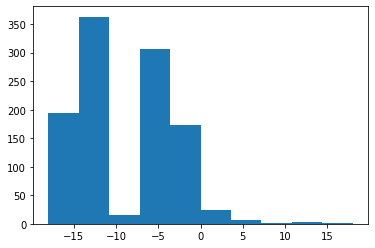

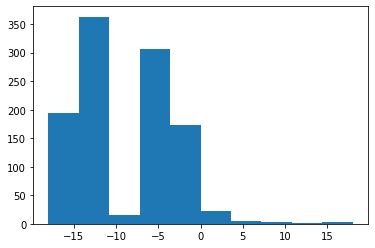

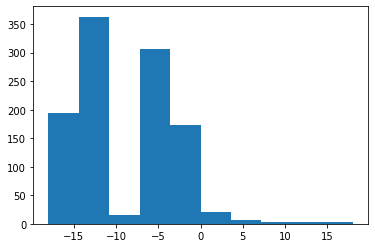

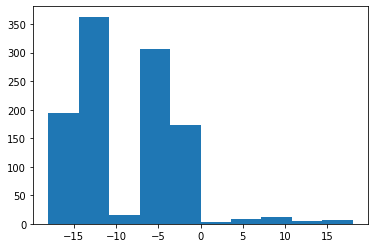

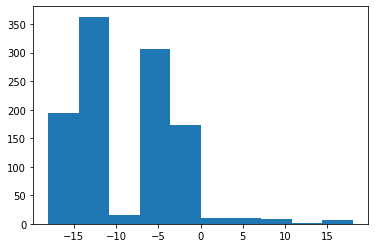

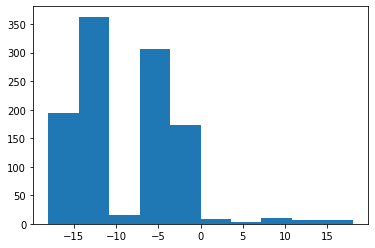

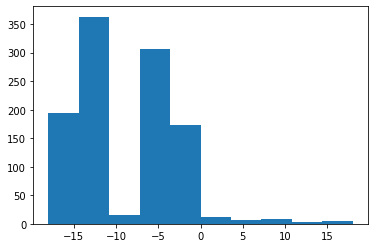

<Figure size 432x288 with 0 Axes>

In [10]:
#plt.scatter(validation['Estimate'], validation['Observed'])
for i in range(0, 7):
    plt.hist(validation[i] - validation['Observed'])
    diff = validation[i] - validation['Observed']
    #print(diff.head())
    plt.figure()
    #plt.plot(range(0, 19), data[3, ])
    
    #validation.iloc[3, :]

In [201]:
validation['Estimate'] = validation['Estimate']

dev_0 = sum((validation['Estimate'] - validation['Observed']) == 0)
dev_1 = sum((validation['Estimate'] - validation['Observed']) == 1)
dev_m1 = sum((validation['Estimate'] - validation['Observed']) == -1)
dev_2 = sum((validation['Estimate'] - validation['Observed']) == 1)
dev_m2 = sum((validation['Estimate'] - validation['Observed']) == -1)

print(dev_0)
print(dev_1)
print(dev_m1)
print(dev_2)
print(dev_m2)

172
38
42
38
42


In [202]:
print((dev_0) / n_ready_real)

0.3788546255506608


# MAX_DIFF

In [136]:
data_diff = data[:, 1:19] - data[:, 0:18]

validation = pd.DataFrame({'Estimate' : np.argmax(data_diff, axis=1) + 2000, 
              'Observed' : turbines['Jahr']}, 
             columns = ['Estimate', 'Observed'])

idx = validation['Observed'] > 2004

validation = validation[idx]

n_ready_real = validation.shape[0]

dev_0 = sum((validation['Estimate'] - validation['Observed']) == 0)
dev_1 = sum((validation['Estimate'] - validation['Observed']) == 1)
dev_m1 = sum((validation['Estimate'] - validation['Observed']) == -1)
dev_2 = sum((validation['Estimate'] - validation['Observed']) == 1)
dev_m2 = sum((validation['Estimate'] - validation['Observed']) == -1)

print(dev_0)
print(dev_1)
print(dev_m1)
print(dev_2)
print(dev_m2)

print((dev_0 + dev_1 + dev_m1 + dev_2 + dev_m2) / n_ready_real)

31
21
242
21
242
0.7196382428940569


(array([ 13.,  49.,  57.,  70.,  69., 380.,  70.,  23.,  22.,  21.]),
 array([-16. , -13.2, -10.4,  -7.6,  -4.8,  -2. ,   0.8,   3.6,   6.4,
          9.2,  12. ]),
 <a list of 10 Patch objects>)

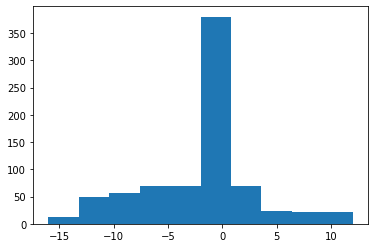

In [112]:
plt.hist(validation['Estimate'] - validation['Observed'])

In [178]:
#data_ = np.array([(1, 2, 3, 4, 5, 6), (1, 0, 1, 2, 2, 2), (1, 2, 3, 6, 5, 4)])
data_ = data


inds = []


for i in range(0, data_.shape[0]):
    ind = 1
    go_on = True
    
    for j in range(1, data_.shape[1]):
        
        if(go_on):
            left = sum(data_[i, j] <= data_[i, :j])
            right_s = 0

            for k in range(j, data_.shape[1]):
                right = sum(data_[i, k] <= data_[i, :j])
                right_s = right_s + right

            if(left == 0 and right_s == 0):
                ind = j
                go_on = False
        
        
    inds.append(ind)
inds

/home/jschmidt/.conda/envs/windturbine-identification/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less_equal
/home/jschmidt/.conda/envs/windturbine-identification/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less_equal
  from ipykernel import kernelapp as app


[1,
 1,
 1,
 1,
 1,
 1,
 18,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 18,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 18,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 18,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 18,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 18,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 18,
 1,
 18,
 1,
 17,
 2,
 1,
 1,
 18,
 18,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 17,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 17,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 18,
 1,
 1,
 1,
 18,
 18,
 2,
 18,
 18,
 18,
 1,
 

In [176]:
inds_ = np.array(inds)
inds_ + 2000

array([2001, 2001, 2001, ..., 2017, 2001, 2001])

In [177]:
validation = pd.DataFrame({'Estimated' : inds_ + 2000, 
                           'Observed' : turbines['Jahr']}, 
             
                          columns = ['Estimate', 'Observed'])

validation

,Estimate,Observed
49,NaN,2000.0
50,NaN,2000.0
51,NaN,2000.0
52,NaN,2000.0
53,NaN,2000.0
54,NaN,2000.0
55,NaN,2000.0
56,NaN,2000.0
57,NaN,2000.0
58,NaN,2000.0


In [171]:
validation = pd.DataFrame({'Estimated' : inds_ + 2000, 
              'Observed' : turbines['Jahr']}, 
             columns = ['Estimate', 'Observed'])


idx = validation['Observed'] > 2004

validation = validation[idx]

n_ready_real = validation.shape[0]

dev_0 = sum((validation['Estimate'] - validation['Observed']) == 0)
dev_1 = sum((validation['Estimate'] - validation['Observed']) == 1)
dev_m1 = sum((validation['Estimate'] - validation['Observed']) == -1)
dev_2 = sum((validation['Estimate'] - validation['Observed']) == 1)
dev_m2 = sum((validation['Estimate'] - validation['Observed']) == -1)

print(dev_0)
print(dev_1)
print(dev_m1)
print(dev_2)
print(dev_m2)

print((dev_0 + dev_1 + dev_m1 + dev_2 + dev_m2) / n_ready_real)



,Estimate,Observed
49,NaN,2000.0
50,NaN,2000.0
51,NaN,2000.0
52,NaN,2000.0
53,NaN,2000.0
54,NaN,2000.0
55,NaN,2000.0
56,NaN,2000.0
57,NaN,2000.0
58,NaN,2000.0


# Prepare data for learning

In [84]:
years = np.array(validation['Observed'].values)
years = np.transpose(years)
years.shape = (years.shape[0], 1)

print(data.shape)
print(years.shape)

(1088, 19)
(1088, 1)


In [85]:
learn_data = np.append(data, years, axis = 1)

In [86]:
X = learn_data[:, 0:-1]
Y = learn_data[:, -1]

In [87]:
# create model
model = Sequential()
model.add(Dense(19, input_dim=19, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')


In [88]:
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)


In [89]:
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))


#kfold = KFold(n_splits=10, random_state=seed)
#results = cross_val_score(estimator, X, Y, cv=kfold)
#print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -3997246.21 (19465.77) MSE
